In [2]:
# Import important libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# File paths
file_path1 = 'Dataset for Knn final.csv' 
file_path2 = 'testset 19-12-2024.csv'

# Check existing files
if not os.path.exists(file_path1):
    raise FileNotFoundError(f"File not found: {file_path1}")
if not os.path.exists(file_path2):
    raise FileNotFoundError(f"File not found: {file_path2}")

# Reading the data from file CSV
data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)


In [4]:
import pandas as pd

# Giả sử data1 là DataFrame
# data1 = pd.DataFrame(...)  # Đây là nơi bạn khởi tạo hoặc nạp dữ liệu

# Kiểm tra các giá trị trong cột 'titleType' và tính phần trăm
value_counts = data1['titleType'].value_counts(normalize=True) * 100

# In ra kết quả
print(value_counts)


titleType
movie           33.122098
tvEpisode       29.451625
short           15.384615
tvSeries         7.893086
tvMovie          5.433555
video            4.536328
videoGame        1.587401
tvMiniSeries     1.305057
tvSpecial        1.035262
tvShort          0.250973
Name: proportion, dtype: float64


In [3]:
def process_data(data, target_column):
    """
Data Processing:
- Check for the existence of the target column.
- Separate feature and label.
- Filter numeric columns.
- Handle missing values ​​in numeric columns.

Args:
data (pd.DataFrame): Input data.
target_column (str): Target column name (label).

Returns:
X (pd.DataFrame): Filtered feature (only contains numeric columns).
y (pd.Series): Label (target column).
    """
    # Make sure the target column exists
    if target_column in data.columns:
        # Separate features and labels
        X = data.drop(columns=[target_column])
        y = data[target_column]
    else:
        raise ValueError(f"Column '{target_column}' không tồn tại trong dữ liệu.")

    # Select numeric columns as input
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

    # Filter data to contain only numeric columns
    X = X[numerical_features]

    # Show selected columns
    print("Selected numerical features:\n", list(numerical_features))
    
    return X, y

# Apply data processing to each file
target_column = 'titleType'
print("Processing Training Data:")
X_train, y_train = process_data(data1, target_column)

print("\nProcessing Test Data:")
X_test, y_test = process_data(data2, target_column)


Processing Training Data:
Selected numerical features:
 ['startYear', 'runtimeMinutes', 'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount', 'averageRating', 'genresEncoded', 'countryEncoded']

Processing Test Data:
Selected numerical features:
 ['startYear', 'runtimeMinutes', 'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount', 'averageRating', 'genresEncoded', 'countryEncoded']


In [5]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

def knn_grid_search(X, y, param_grid, cv=5, scoring='accuracy'):
    """
Find optimal parameters for KNN using GridSearchCV.

Args:
X (pd.DataFrame): Feature matrix.
y (pd.Series): Target vector.
param_grid (dict): Parameters for Grid Search.
cv (int): Number of cross-validation folds.
scoring (str): Evaluation criteria (default is 'accuracy').

Returns:
best_knn (KNeighborsClassifier): Best KNN model.
best_params (dict): Optimum parameters.
    """

    # Model Initialization and Grid Search
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring=scoring, verbose=1, n_jobs=-1)

    # Train Grid Search for all data set
    grid_search.fit(X, y)

    # print the best value
    print(f"Best parameters found: {grid_search.best_params_}")
    print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_, grid_search.best_params_

# Set Grid Search parameters
param_grid = {
    'n_neighbors': list(range(1, 51, 2)),  # K from 1 to 50, step 2
    'weights': ['uniform', 'distance'],    # weights
    'metric': ['euclidean', 'manhattan']   # Euclidean and Manhattan distance
}

# Apply Grid Search to the training dataset
print("Running Grid Search for KNN...")
best_knn, best_params = knn_grid_search(X_train, y_train, param_grid)

# Evaluation on test set
print("\nEvaluating the best model on test data...")
y_pred = best_knn.predict(X_test)

# print the report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Running Grid Search for KNN...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validated accuracy: 0.8188

Evaluating the best model on test data...


C:\Users\manht\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\manht\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\manht\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manht\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\manht\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro


Classification Report:
               precision    recall  f1-score   support

       movie       0.83      0.91      0.87      1795
       short       0.88      0.87      0.88       760
   tvEpisode       0.83      0.95      0.88      1597
tvMiniSeries       0.75      0.08      0.14        75
     tvMovie       0.50      0.19      0.28       299
    tvSeries       0.86      1.00      0.92       409
     tvShort       0.00      0.00      0.00        16
   tvSpecial       0.38      0.12      0.19        48
       video       0.57      0.36      0.44       222
   videoGame       0.62      0.17      0.27        92

    accuracy                           0.82      5313
   macro avg       0.62      0.46      0.49      5313
weighted avg       0.80      0.82      0.80      5313

Test Accuracy: 0.8236


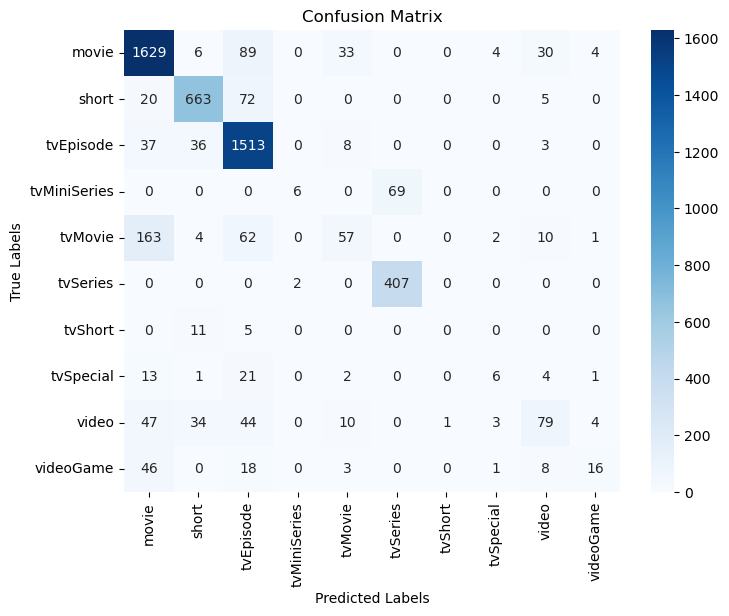

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


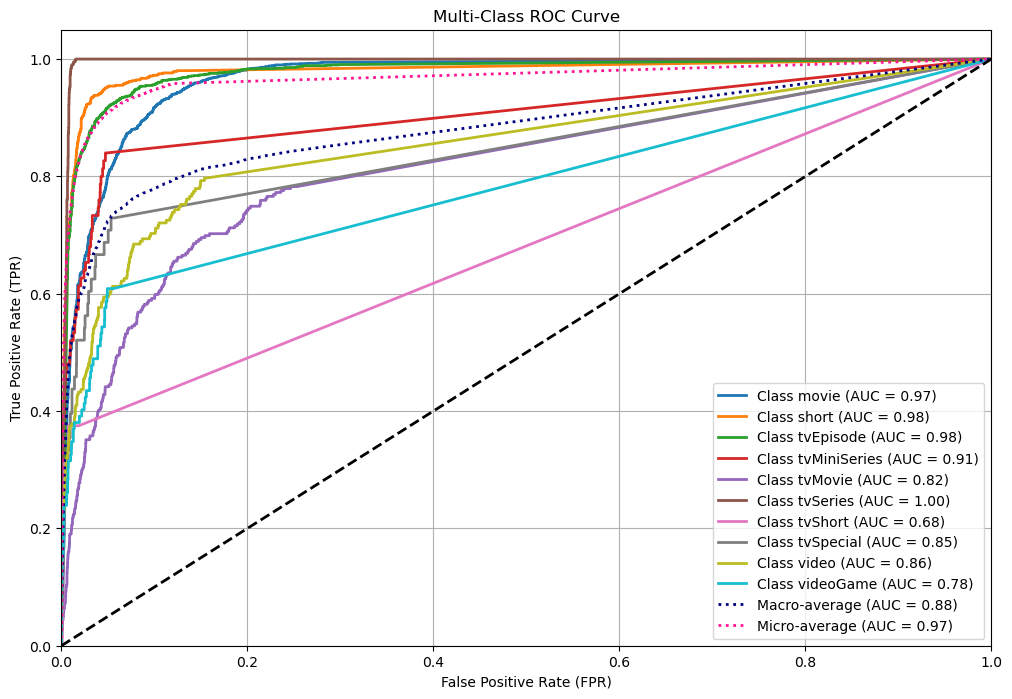

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for multi-class ROC
classes = best_knn.classes_
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_prob = best_knn.predict_proba(X_test)  # Predicted probabilities

# Prepare variables for macro-average ROC and micro-average ROC
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC Curve and AUC for each class
for i, class_label in enumerate(classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Compute macro-average ROC and AUC
all_fpr = np.unique(np.concatenate([fpr[class_label] for class_label in classes]))
mean_tpr = np.zeros_like(all_fpr)
for class_label in classes:
    mean_tpr += np.interp(all_fpr, fpr[class_label], tpr[class_label])
mean_tpr /= len(classes)
macro_fpr = all_fpr
macro_tpr = mean_tpr
macro_auc = auc(macro_fpr, macro_tpr)

# Compute micro-average ROC and AUC
micro_fpr, micro_tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
micro_auc = auc(micro_fpr, micro_tpr)

# Plot all ROC Curves
plt.figure(figsize=(12, 8))

# Individual class ROC Curves
for i, class_label in enumerate(classes):
    plt.plot(fpr[class_label], tpr[class_label], lw=2, label=f"Class {class_label} (AUC = {roc_auc[class_label]:.2f})")

# Macro-average ROC Curve
plt.plot(macro_fpr, macro_tpr, color='navy', linestyle=':', linewidth=2, label=f"Macro-average (AUC = {macro_auc:.2f})")

# Micro-average ROC Curve
plt.plot(micro_fpr, micro_tpr, color='deeppink', linestyle=':', linewidth=2, label=f"Micro-average (AUC = {micro_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
